# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [250]:
#Importando as bibliotecas necessárias

#Para manipulação e visualização de dados:
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

#Para codificação e padronização  dos dados:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Para implementação da análise K-Means
from sklearn.cluster import KMeans


#Para teste dos hiperparâmetros
from sklearn.metrics import silhouette_score


In [251]:
#Definindo o dataset:
df = pd.read_csv('C:/Users/yurid/Downloads/Mall_Customers.csv', delimiter=',')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [252]:
#Verificando valores nulos e os tipos de variáveis:
print('Resumo dos dados')
print(df.info())
print('\n')
print('Verificação de valores nulos')
print(df.isnull().sum())

Resumo dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Verificação de valores nulos
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [253]:
#Verificando valores únicos na coluna Gender
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [254]:
#Convertendo a coluna 'Gender' para valores numéricos utilizando LabelEncoder, já que é uma coluna binária (Male/Female)
labels = LabelEncoder()
df['gender_cod'] = labels.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_cod
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [255]:
#Eliminando as colunas ID e Gender
df.drop(['CustomerID', 'Gender'], inplace = True, axis = 1)
df

,Age,Annual Income (k$),Spending Score (1-100),gender_cod
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [256]:
#Verificando as distribuições das variáveis:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_cod
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


Da tabela acima, temos valores de média e mediana relativamente próximos, o que indica uma distribuição próxima à normal. Agora, vamos verificar as distribuições por meio boxplots:

In [257]:
#Plotando os boxplots:
fig = make_subplots(rows=1, cols=4)
colors = ['orchid', 'tomato', 'olive', 'turquoise']

for i, coluna in enumerate(df.columns):
    fig.add_traces(go.Box(y=df[coluna],
                                name = coluna,
                                marker_color = colors[i],
                          boxpoints = 'all',
                          showlegend = False),
                   rows = 1,
                   cols = i+1)

fig.update_layout(title_text = 'Distribuição das variáveis')
fig.show()

Conforme os boxplots acima, vemos que o conjunto de dados analisados não apresenta outliers aparentes, com os dados distribuídos ao redor da mediana. Todavia, a exceção vai para a variável gênero, que por ser binária não se qualifica para esta análise. Agora, antes de partir para o modelo K-Means, vamos verificar a relação dos dados com pairplot

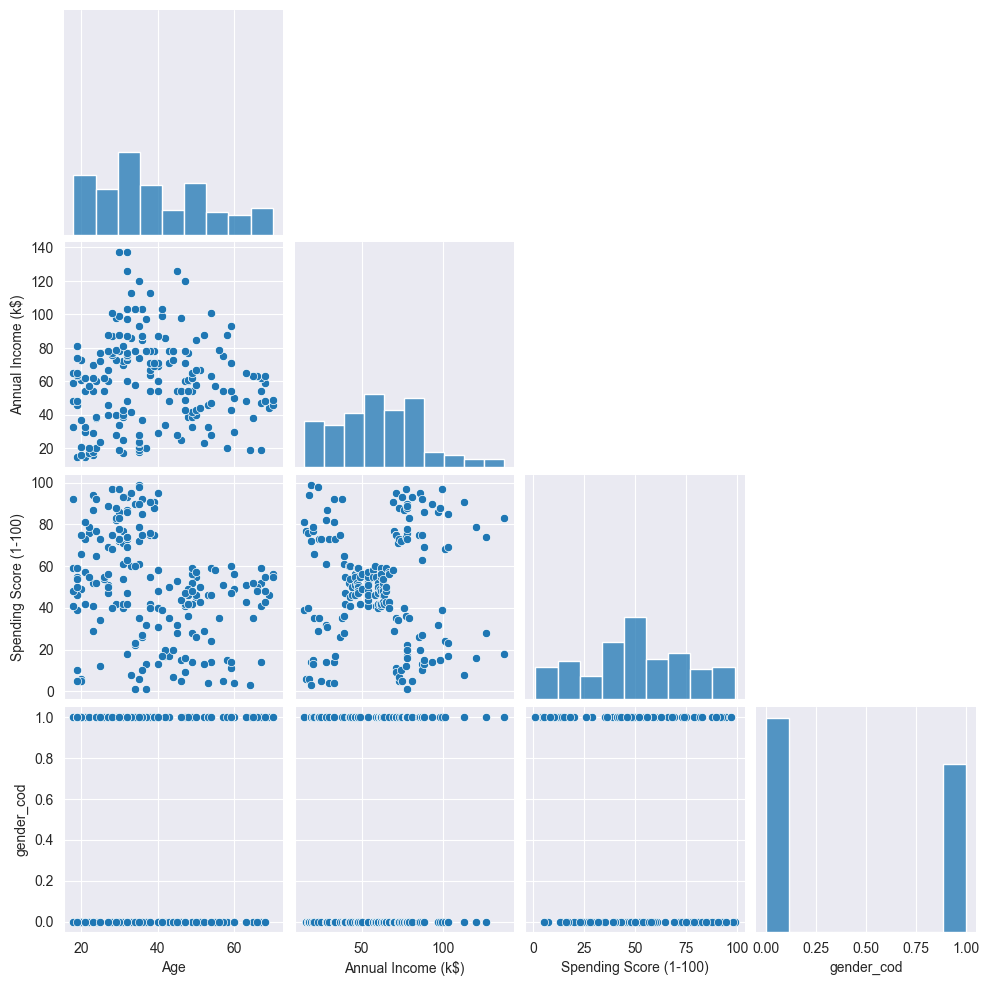

In [258]:
sns.pairplot(df,
             corner=True)

Conforme o pairplot, podemos notar que há melhor distinção em clusters entre Spending Score e Annual Income. Aparentemente, é possível separar 5 clusters. Agora, vamos padronizar os dados e implementar o k-means.

In [259]:
#Padronização dos dados:
sd = StandardScaler()
df_pad = df.copy()
colunas_pad = df_pad.columns
df_pad[colunas_pad] = sd.fit_transform(df_pad[colunas_pad])
df_pad


,Age,Annual Income (k$),Spending Score (1-100),gender_cod
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [260]:
#Vamos testar o melhor número de clusters utilizando o Método do Cotovelo

#Definindo os valores de k e a lista dos valores da inércia:
k = [2,3,4,5,6,7]
inercia = []

#Criando um loop para armazenar os valores da inercia:
for i in k:
    kmeans = KMeans(n_clusters = i,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df_pad)
    inercia.append(kmeans.inertia_)


#Plotando o gráfico para escolha do melhor valor de k:

fig = go.Figure()

fig.add_traces(go.Scatter(x=k,
                          y=inercia,
                          mode = 'lines',
                          marker_color = 'purple',
                          line=dict(width = 5)))

fig.update_layout(title_text = 'Método do Cotovelo para determinação do número de clusters',
                  xaxis_title = 'n_clusters',
                  yaxis_title = 'Inércia',
                  width = 800,
                  height = 600)

fig.show()

Do gráfico, temos que a queda mais brusca de inclinação ocorrendo de 2 para 3, o que poderia definir k=3 como o número ideal. Todavia, a curva se suavisa após k=4, o que torna este valor um candidato. Assim, para garantir a melhor escolha, utilizaremos o Silhouette Score.

In [261]:
#Definindo os valores que serão testados
k_test = [2,3,4,5]

#Loop para o teste
for k in k_test:
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    labels = kmeans.fit_predict(df_pad)
    score = silhouette_score(df_pad, labels)

    print(f'Para k={k}, temos o score de {score: .4f}')

Para k=2, temos o score de  0.2518
Para k=3, temos o score de  0.2595
Para k=4, temos o score de  0.2984
Para k=5, temos o score de  0.3041


Dados os valores de k mostrados acima, o melhor valor após os testes é o de k=5. Assim, seguiremos na aplicação do modelo com esse parâmetro definido.

In [262]:
#Definindo o modelo com o parâmetro escolhido
modelo_kmeans = KMeans(n_clusters=5,
                       n_init = 10,
                       random_state = 42)

#Aplicando o modelo aos dados
modelo_kmeans.fit(df_pad)


,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [280]:
#Separando os itens para o gráfico:
centroides_pad = modelo_kmeans.cluster_centers_
ctr_orig = sd.inverse_transform(centroides_pad)

cost_colors = {0: 'orchid',
               1: 'red',
               2: 'turquoise',
               3: 'green',
               4: 'yellow'}

df['labels'] = modelo_kmeans.labels_
df['colors'] = df['labels'].map(cost_colors)
unique_clusters = sorted(df['labels'].unique())


#Plotando o gráfico
fig = go.Figure()
for i, cluster in enumerate(unique_clusters):
    df_clusters = df[df['labels'] == cluster]
    color_name = df_clusters['colors'].iloc[0]
    fig.add_traces(go.Scatter(x=df_clusters['Spending Score (1-100)'],
                   y= df_clusters['Annual Income (k$)'],
                              mode = 'markers',
                              name=f'Cluster {cluster.astype(str)}',
                              marker = dict(color = color_name,
                                            size=8)))
    centroide_x = ctr_orig[cluster, 2]
    centroide_y = ctr_orig[cluster, 1]
    fig.add_traces(go.Scatter(x=[centroide_y],
                              y=[centroide_x],
                              mode = 'markers',
                              name= 'Centroides',
                              legendgroup = 'Centroides',
                              showlegend = (i==4),

                              marker = dict(color = 'pink',
                                            size = 20,
                                            symbol = 'hexagon',
                                            line = dict(color = 'black', width = 2))))


fig.update_layout(title_text = 'Análise k-means',
                  xaxis_title = 'Spending Score (1-100)',
                  yaxis_title = 'Annual Income (k$)')
fig.show()


Conforme o gráfico acima, a análise de k-means foi inconclusiva. Todavia, vale tentar tirar alguma interpretação dela. Primeiramente, o cluster 0 (roxo) apresenta pessoas com renda elevada (acima de 60) e com score de gastos também elevado (entre 60 e 100), o que indica que temos um grupo com alto poder aquisitivo e que gasta consideravelmente. Nesta via, uma estratégia é o direcionamento de ofertas em produtos de alto padrão para clientes desse grupo. Em contrapartida, o cluster 3 (verde), apresenta baixa renda em comparação ao cluster anterior, embora possua score de gastos elevado. Assim, cabe direcionar ofertas de produtos de padrão menor a este grupo.
Além disso, o grupo vermelho apresenta alta renda e baixo score de gastos, o que torna inviável uma estratégia de marketing direcionada ao grupo. Por fim, os grupos azul e amaerelo estão muito dispersos, de modo que não é possível fazer uma análise precisa.